<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques, such as regularization, that are used to avoid overfitting (but haven't practiced them yet). In this lesson we'll discuss a fundamental method for avoiding overfitting that is commonly referred to as _train/test split_ validation. 

The idea is similar to something called "cross-validation" — in fact, it is a type of cross-validation — in that we split the data set into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California and 20 percent data from elsewhere and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case we've still overfit on our data set because we did not sufficiently randomize the data.

In a situation like this we can use _k-fold cross-validation_, which is the same idea applied to more than two subsets. In particular, we partition our data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. We can do this for each of the possible $k-1$ subsets.

# Independent Practice

Ultimately we use a test-training split to compare multiple models on the same data set. This could be comparisons of two linear models or of completely different models on the same data.

For your independent practice, fit three different models on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model you'd like. 

### Here's What We Will Be Doing:

* Working with Boston housing data to predict the value of a home
* Create a test-train split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the test data.
* Rank the models by how well they score on the testing data set.

**Then, try k-folds.**

* Try a few different splits of data for the same models.
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?

**Be sure to provide interpretation for your results.**

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Use Case

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston. This is a probable use case: We are predicting a continuous, numeric output (price) based on a combination of discrete features.

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 1. Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

In [3]:
# Exploratory data analysis.

# Include: 
# total nulls
print("Number of nulls in the features:\n" + str(X.isnull().sum()))
print()
print("Number of nulls in MEDV:\n" + str(y.isnull().sum()))

Number of nulls in the features:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

Number of nulls in MEDV:
MEDV    0
dtype: int64


In [4]:
# index
print("Feature DF index:\n", X.index)
print()
print("MEDV DF index:\n", y.index)

Feature DF index:
 RangeIndex(start=0, stop=506, step=1)

MEDV DF index:
 RangeIndex(start=0, stop=506, step=1)


In [5]:
# data types
print("Feature DF data types:\n" + str(X.dtypes))
print()
print("MEDV DF data types:\n" + str(y.dtypes))

Feature DF data types:
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

MEDV DF data types:
MEDV    float64
dtype: object


In [6]:
# shape
print("Feature DF shape:\n", X.shape)
print()
print("MEDV DF shape:\n", y.shape)

Feature DF shape:
 (506, 13)

MEDV DF shape:
 (506, 1)


In [7]:
# summary statistics
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [8]:
y.describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [9]:
# number of unique values for each column
# Use apply to get all of the columns from the Feature dataframe X
X.apply(lambda x: print(str(x.name) + ": " + str(len(x.unique()))));
print()
print("MEDV: ", len(y['MEDV'].unique()))

CRIM: 504
ZN: 26
INDUS: 76
CHAS: 2
NOX: 81
RM: 446
AGE: 356
DIS: 412
RAD: 9
TAX: 66
PTRATIO: 46
B: 357
LSTAT: 455

MEDV:  229


## Using `scikit-learn` Linear Regression

### 2. Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict our target variable, MEDV.
You **must** justify the choice of your predictors. Score and plot your predictions. What do these results tell us?

In [10]:
import seaborn as sns

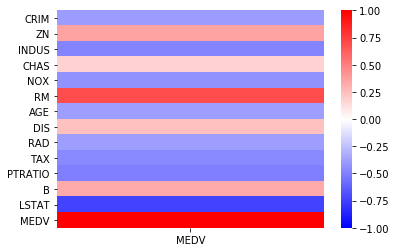

In [11]:
# Look at a heatmap to get a sense of correlations, only need to
# grab the 'MEDV' column because that's the only correlation we
# care about right now
# Use '.concat()' to join X with y so we can use the resulting 
# dataframe to more easily see the correlations between our y
# variable and each of our X variables
sns.heatmap(pd.concat([X, y], axis = 1).corr()[['MEDV']], 
            cmap = 'bwr', vmin = -1);

In [12]:
# Since the heatmap above shows a lot of strong correlations,
# look at the absolute values of these correlations 
# to figure out which ones have the greatest influence on MEDV
pd.concat([X,y], 
          axis = 1).corr()['MEDV'].abs().sort_values(ascending=False)

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

In [13]:
# Top candidates are LSTAT, RM, PTRATIO, and/or INDUS
# but we want to avoid too much intercorrelation &
# most of these are pretty strongly correlated with MEDV anyways
# Cycle through top 7 to determine which combination of 4 variables
# has best combination of correlation with MEDV and least 
# inter-correlation with each other
# itertools from:
# https://stackoverflow.com/questions/5360220/
# how-to-split-a-list-into-pairs-in-all-possible-ways?lq=1
import itertools
# Creating a list of the top candidates from the output above
top_cands = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM']
# Break these into all possible combinations of 4 using itertools
combos = list(itertools.combinations(top_cands, 4))
# Create a dictionary with the total correlations between each 
# combination as the keys and the combinations themselves as the values
best_corr = {}
for combo in combos:
    best_corr[(pd.concat([X,y], axis = 1).corr().loc[list(combo),'MEDV'].abs().sum() - 
              X.corr().abs().loc[list(combo)[1:],combo[0]].sum())] = combo

# Finally get the combination with the best combination
# of maximum correlation with 'MEDV' and
# smallest inter-correlation value
best_corr[max(best_corr.keys())]

('RM', 'PTRATIO', 'TAX', 'CRIM')

Based on the above code to evaluate the best weighting of all 4 of the top half of the variables against their intercorrelation, the best 4 variables to use are: __RM, PTRATIO, TAX, and CRIM__

### 3. Try 70/30 and 90/10 train/test splits (70% of the data for training - 30% for testing, then 90% for training - 10% for testing)
Score and plot. How do your metrics change? What does this tell us about the size of training/testing splits?

In [14]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# We can get our features from the 'best_corr' dictionary we
# created from the last step
features = list(best_corr[max(best_corr.keys())])
# from class - our X variable needs to be a DF
X_model = X[features]
# while our y variable can be a series
y_model = y['MEDV']

In [15]:
# Baseline score: checking the RMSE with the 'null' values of
# all predictions being the mean MEDV value - with default split
# using random_state of 25 for all tests so that
# results are repeatable
# Since there are going to be 3 models, they
# will be denoted with '_0', '_1', and '_2'
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(
    X_model, y_model, random_state=25)

In [16]:
# This line is from class to make a series with the same
# number of entries as our 'y_test' variable
y_null = np.zeros_like(y_test_0, dtype=float)
y_null.fill(y_test_0.mean())
# Verify that our output is correct (numPy array of mean value)
y_null

array([22.31889764, 22.31889764, 22.31889764, 22.31889764, 22.31889764,
       22.31889764, 22.31889764, 22.31889764, 22.31889764, 22.31889764,
       22.31889764, 22.31889764, 22.31889764, 22.31889764, 22.31889764,
       22.31889764, 22.31889764, 22.31889764, 22.31889764, 22.31889764,
       22.31889764, 22.31889764, 22.31889764, 22.31889764, 22.31889764,
       22.31889764, 22.31889764, 22.31889764, 22.31889764, 22.31889764,
       22.31889764, 22.31889764, 22.31889764, 22.31889764, 22.31889764,
       22.31889764, 22.31889764, 22.31889764, 22.31889764, 22.31889764,
       22.31889764, 22.31889764, 22.31889764, 22.31889764, 22.31889764,
       22.31889764, 22.31889764, 22.31889764, 22.31889764, 22.31889764,
       22.31889764, 22.31889764, 22.31889764, 22.31889764, 22.31889764,
       22.31889764, 22.31889764, 22.31889764, 22.31889764, 22.31889764,
       22.31889764, 22.31889764, 22.31889764, 22.31889764, 22.31889764,
       22.31889764, 22.31889764, 22.31889764, 22.31889764, 22.31

In [17]:
# Get the RMSE of this null case
print('Null model RMSE: ', 
      np.sqrt(metrics.mean_squared_error(y_test_0, y_null)))

Null model RMSE:  8.452961390253272


In [18]:
# plot y_test outputs against residuals
resid_0 = y_test_0 - y_null

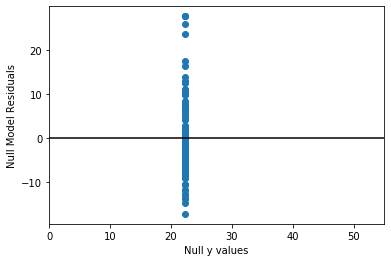

In [19]:
plt.scatter(y_null, resid_0)
plt.hlines(0, 0, 55)
plt.xlim(0,55);
plt.xlabel('Null y values')
plt.ylabel('Null Model Residuals');

In [20]:
# 70/30
# test_size, train_size attributes from:
#http://scikit-learn.org/stable/modules/generated/
# sklearn.model_selection.train_test_split.html
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    X_model, y_model, random_state=25, test_size = 0.3, train_size=0.7)

In [21]:
# This time actually fit a linear regression model using
# the '.predict()' method with the x and y training data
lr_1 = LinearRegression()
lr_1.fit(X_train_1, y_train_1)
# Our predictions are made with the X test data
y_pred_1 = lr_1.predict(X_test_1)

In [22]:
# Check the RMSE of this split and see if we did better than
# baseline
print("70/30 split RMSE: ", np.sqrt(
    metrics.mean_squared_error(y_test_1, y_pred_1)))

70/30 split RMSE:  5.873465290973561


In [23]:
# Get these residuals and see if they have a better distribution
resid_1 = y_test_1 - y_pred_1

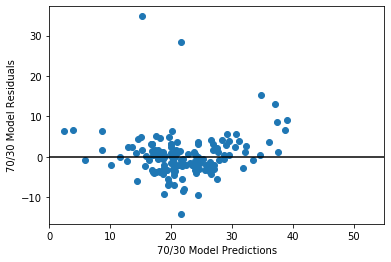

In [24]:
plt.scatter(y_pred_1, resid_1)
plt.hlines(0, 0, 55)
plt.xlim(0, 55)
plt.xlabel('70/30 Model Predictions')
plt.ylabel('70/30 Model Residuals');

In [25]:
# 90/10
# repeat the same steps as with the previous split, but use
# different 'test_size' and 'train_size' variables
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
X_model, y_model, random_state=25, test_size=0.1, train_size=0.9)

In [26]:
lr_2 = LinearRegression()
lr_2.fit(X_train_2, y_train_2)
y_pred_2 = lr_2.predict(X_test_2)

In [27]:
print("90/10 split RMSE: ", np.sqrt(
    metrics.mean_squared_error(y_test_2, y_pred_2)))

90/10 split RMSE:  7.849473319997687


In [28]:
resid_2 = y_test_2 - y_pred_2

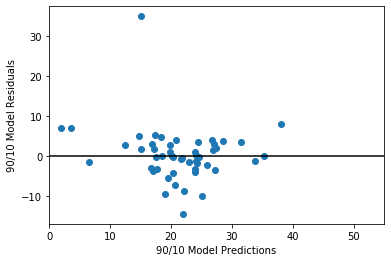

In [29]:
plt.scatter(y_pred_2, resid_2)
plt.hlines(0, 0, 55)
plt.xlim(0, 55)
plt.xlabel('90/10 Model Predictions')
plt.ylabel('90/10 Model Residuals');

### Conclusion
It appears that using more data can make our predictions worse if it leads to over-fitting/higher variance

### 4. Use k-fold cross validation varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds?

In [30]:
# Adding cross_val_score to easily perform averaging of K-fold models
from sklearn.model_selection import KFold, cross_val_score
# To make this section easier, creating a function to loop
# through a range of 'k's' to evaluate the model at each of
# those iteration sizes
# using default values of '5' and '10' to address the problem
# statement
def kf_score_range(start=5, end=10):
    for i in range(start, end+1):
        # initialize the linreg and kf models at the
        # start of each iteration
        linreg = LinearRegression()
        kf = KFold(n_splits=i, shuffle=True)
        # print out the number of folds
        # the mean RMSE
        # and variance for each iteration
        # 'explained_variance' keyword from:
        # http://scikit-learn.org/stable/modules/model_evaluation.html
        print("Folds: ", i)
        print("----------------")
        print("Average RMSE: ", np.mean(
            np.sqrt(-cross_val_score(lr_1, X_model, y_model, cv=kf, 
                             scoring = 'neg_mean_squared_error', n_jobs=1))
        ))
        print("Average R-squared: ", np.mean(
            cross_val_score(linreg, X_model, y_model, cv=kf, n_jobs=1)))
        print("Average Variance: ", np.mean(
            cross_val_score(linreg, X_model, y_model, cv=kf,
                            scoring = 'explained_variance', n_jobs=1)))
        print('\n')
    return

In [31]:
# Show default range request by problem statement
kf_score_range()

Folds:  5
----------------
Average RMSE:  5.750284712057031
Average R-squared:  0.5972396693462773
Average Variance:  0.5996470840465227


Folds:  6
----------------
Average RMSE:  5.821937856872428
Average R-squared:  0.5833561362062145
Average Variance:  0.5942636441954969


Folds:  7
----------------
Average RMSE:  5.742264459558532
Average R-squared:  0.5846831833950448
Average Variance:  0.6042398486240145


Folds:  8
----------------
Average RMSE:  5.7355790716205295
Average R-squared:  0.5762416478025951
Average Variance:  0.5949340002861558


Folds:  9
----------------
Average RMSE:  5.666258884359866
Average R-squared:  0.600990663064167
Average Variance:  0.5907038469997574


Folds:  10
----------------
Average RMSE:  5.769051797194772
Average R-squared:  0.581190385123565
Average Variance:  0.6120307000708676




### Evaluation:
Within the range of 5 - 10 folds, nothing much changes, the optimum appears to be '10' folds, with average RMSE adn Variance generally going down as the number of folds increases

__NOTE:__ KFold() is instantiated with 'shuffle = True' so the results
are not the same every time

In [32]:
# Since we don't see too much change in the 5-10 range, 
# lets try with a wider range - also showing that the
# function works with specified inputs
kf_score_range(2, 20)

Folds:  2
----------------
Average RMSE:  5.944230263404705
Average R-squared:  0.5856166113794882
Average Variance:  0.584272818194803


Folds:  3
----------------
Average RMSE:  5.780637244290319
Average R-squared:  0.5867038565072299
Average Variance:  0.5769920075397311


Folds:  4
----------------
Average RMSE:  5.792819703578017
Average R-squared:  0.5962652091858058
Average Variance:  0.5958139427927955


Folds:  5
----------------
Average RMSE:  5.807174026341016
Average R-squared:  0.5774933179632823
Average Variance:  0.5714223861057016


Folds:  6
----------------
Average RMSE:  5.739245865295789
Average R-squared:  0.6018277818446548
Average Variance:  0.5995551268852353


Folds:  7
----------------
Average RMSE:  5.768806421278002
Average R-squared:  0.5973504071712699
Average Variance:  0.5899264331934395


Folds:  8
----------------
Average RMSE:  5.799851093148179
Average R-squared:  0.5881728550072565
Average Variance:  0.597553792534983


Folds:  9
----------------
Av

In [33]:
# Still doesn't vary that much accross number of folds...

# KNN Practice

In [34]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [35]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [36]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [37]:
# Map each iris species to a number
# Let's use 'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and create a column called 'species_num'
# This is Directly from class (typed out):
iris['species_num'] = iris['species'].map({'Iris-setosa':0, 
                                           'Iris-versicolor':1, 
                                           'Iris-virginica':2})
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


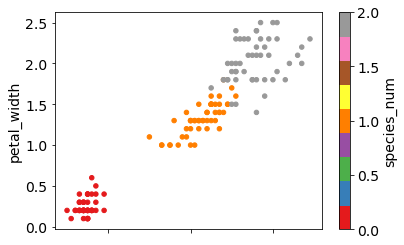

In [38]:
# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
# Colormap from:
#https://matplotlib.org/users/colormaps.html
iris.plot(kind='scatter', x='petal_length', y='petal_width', 
          c='species_num', colormap='Set1');

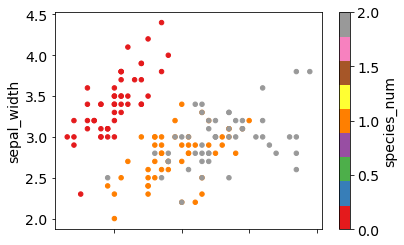

In [39]:
# Create a scatterplot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='sepal_length', y='sepal_width',
         c = 'species_num', colormap='Set1');

## KNN Classification of the Iris Dataset

### Create your feature matrix "X"
This will be all species measurements (sepal length, petal width, etc...)

In [40]:
# We can get our features by just taking a copy of the dataset
# minus the 'species' variables
X_iris = iris.drop(['species', 'species_num'], axis=1)
# Make sure the X looks right
X_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Create your target vector "y"
This will be the species type.

In [41]:
# Just need the categorical 'species_num' variable
# from the original dataset & make sure it looks right
y_iris = iris['species_num']
y_iris.head()

0    0
1    0
2    0
3    0
4    0
Name: species_num, dtype: int64

### Make Use of Train-Test-Split
Split your data in to train and test sets.

In [42]:
(X_train_iris, X_test_iris, 
y_train_iris, y_test_iris) = train_test_split(
                            X_iris, y_iris, random_state=25) 

### Import KNN From `scikit-learn` and Instatiate a Model With One Neighbor

In [43]:
from sklearn.neighbors import KNeighborsClassifier
# Create the model with a 'n_neighbors' value of 1
knn_1 = KNeighborsClassifier(n_neighbors=1)

### Check the Accuracy
Train your model using the training set then use the test set to determine the accuracy

In [44]:
# use .fit() to train the model
knn_1.fit(X_train_iris, y_train_iris)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [45]:
# get predictions using test X data
y_pred_iris = knn_1.predict(X_test_iris)
# and get accuracy from the metrics library
print('using metrics: ', metrics.accuracy_score(y_test_iris, y_pred_iris))

using metrics:  0.9210526315789473


In [46]:
# Verify that this is the same as uing the built-in KNN '.score()'
# function
print("Model accuracy with 1 neighbor:", 
      knn_1.score(X_test_iris, y_test_iris))

Model accuracy with 1 neighbor: 0.9210526315789473


### Create a Model With Five Neighbors. Did it Improve?

In [47]:
# Repeat above with 'n_neighbors' set to '5'
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train_iris, y_train_iris)
print("Model accuracy with 5 neighbors:", 
      knn_5.score(X_test_iris, y_test_iris))

Model accuracy with 5 neighbors: 0.9210526315789473


#### Analysis:
The model does improve with 5 neighbors instead of 1 (by ~1%)

### Create a Looped Function That Will Check All Levels of Various Neighbors and Calculate the Accuracy

In [48]:
# Use similar logic as in the K-folds portion of the notebook
def knn_accuracy(start=1, end=10):
    for n in range(start, end+1):
        knn=KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train_iris, y_train_iris)
        score = knn.score(X_test_iris, y_test_iris)
        
        print("KNN Model accuracy with " + str(n) + " Neighbor(s):", 
             score)
    return

In [49]:
# Show the default 1 through 10 case
knn_accuracy()

KNN Model accuracy with 1 Neighbor(s): 0.9210526315789473
KNN Model accuracy with 2 Neighbor(s): 0.9210526315789473
KNN Model accuracy with 3 Neighbor(s): 0.9473684210526315
KNN Model accuracy with 4 Neighbor(s): 0.9210526315789473
KNN Model accuracy with 5 Neighbor(s): 0.9210526315789473
KNN Model accuracy with 6 Neighbor(s): 0.9473684210526315
KNN Model accuracy with 7 Neighbor(s): 0.9473684210526315
KNN Model accuracy with 8 Neighbor(s): 0.9736842105263158
KNN Model accuracy with 9 Neighbor(s): 0.9736842105263158
KNN Model accuracy with 10 Neighbor(s): 0.9736842105263158


In [50]:
# Show custom range input
knn_accuracy(7, 13)

KNN Model accuracy with 7 Neighbor(s): 0.9473684210526315
KNN Model accuracy with 8 Neighbor(s): 0.9736842105263158
KNN Model accuracy with 9 Neighbor(s): 0.9736842105263158
KNN Model accuracy with 10 Neighbor(s): 0.9736842105263158
KNN Model accuracy with 11 Neighbor(s): 0.9736842105263158
KNN Model accuracy with 12 Neighbor(s): 0.9736842105263158
KNN Model accuracy with 13 Neighbor(s): 0.9736842105263158


### Bonus: According to `scikit-learn` Documentation, What is `knn.predict_proba(X_new)` Going to Do?

__From the Docstring:__
"Return probability estimates for the test data X."

__From http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.predict_proba:__
knn.predict_proba(X_new) is going to return a numpy array of lists for each row in X_new,  each list holding the probability of each entry being a given Iris species.  So in this case, each list will have 3 entries of probabilities adding up to 1.0


## Enrichment
_Everything beyond this point is enrichment and examples using Statsmodels for linear regression._

### Example: Using the Statsmodels Formula

Adapt the formula example using your metrics. We will review this implementation in class. Here is a reference to consider. The workflow is the same, but the syntax is a little different. We want to get accustomed to the formula syntax because we will be using them a lot more with regressions. The results should be comparable to scikit-learn's regression models.

In [51]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [52]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              1221.
Date:                Sun, 12 Jul 2020   Prob (F-statistic):                   1.38e-321
Time:                        00:56:24   Log-Likelihood:                         -1567.5
No. Observations:                 506   AIC:                                      3151.
Df Residuals:                     498   BIC:                                      3185.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9729      0.224     22.195      0.000       4.533       5.413
LSTAT         -0.5606      0.048    -11.795      0.000      -0.654      -0.467
RAD            0.2128      0.070      3.050      0.002       0.076       0.350
TAX           -0.0174      0.004     -4.272      0.000      -0.025      -0.009
NOX            4.3448      3.384      1.284      0.200      -2.304      10.994
INDUS          0.0924      0.067      1.383      0.167      -0.039       0.224
CRIM          -0.0891      0.037     -2.423      0.016      -0.161      -0.017
ZN             0.0288      0.013      2.220      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.139   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              832.155
Skew:                           1.666   Prob(JB):                    1.99e-181
Kurtosis:                       8.326   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

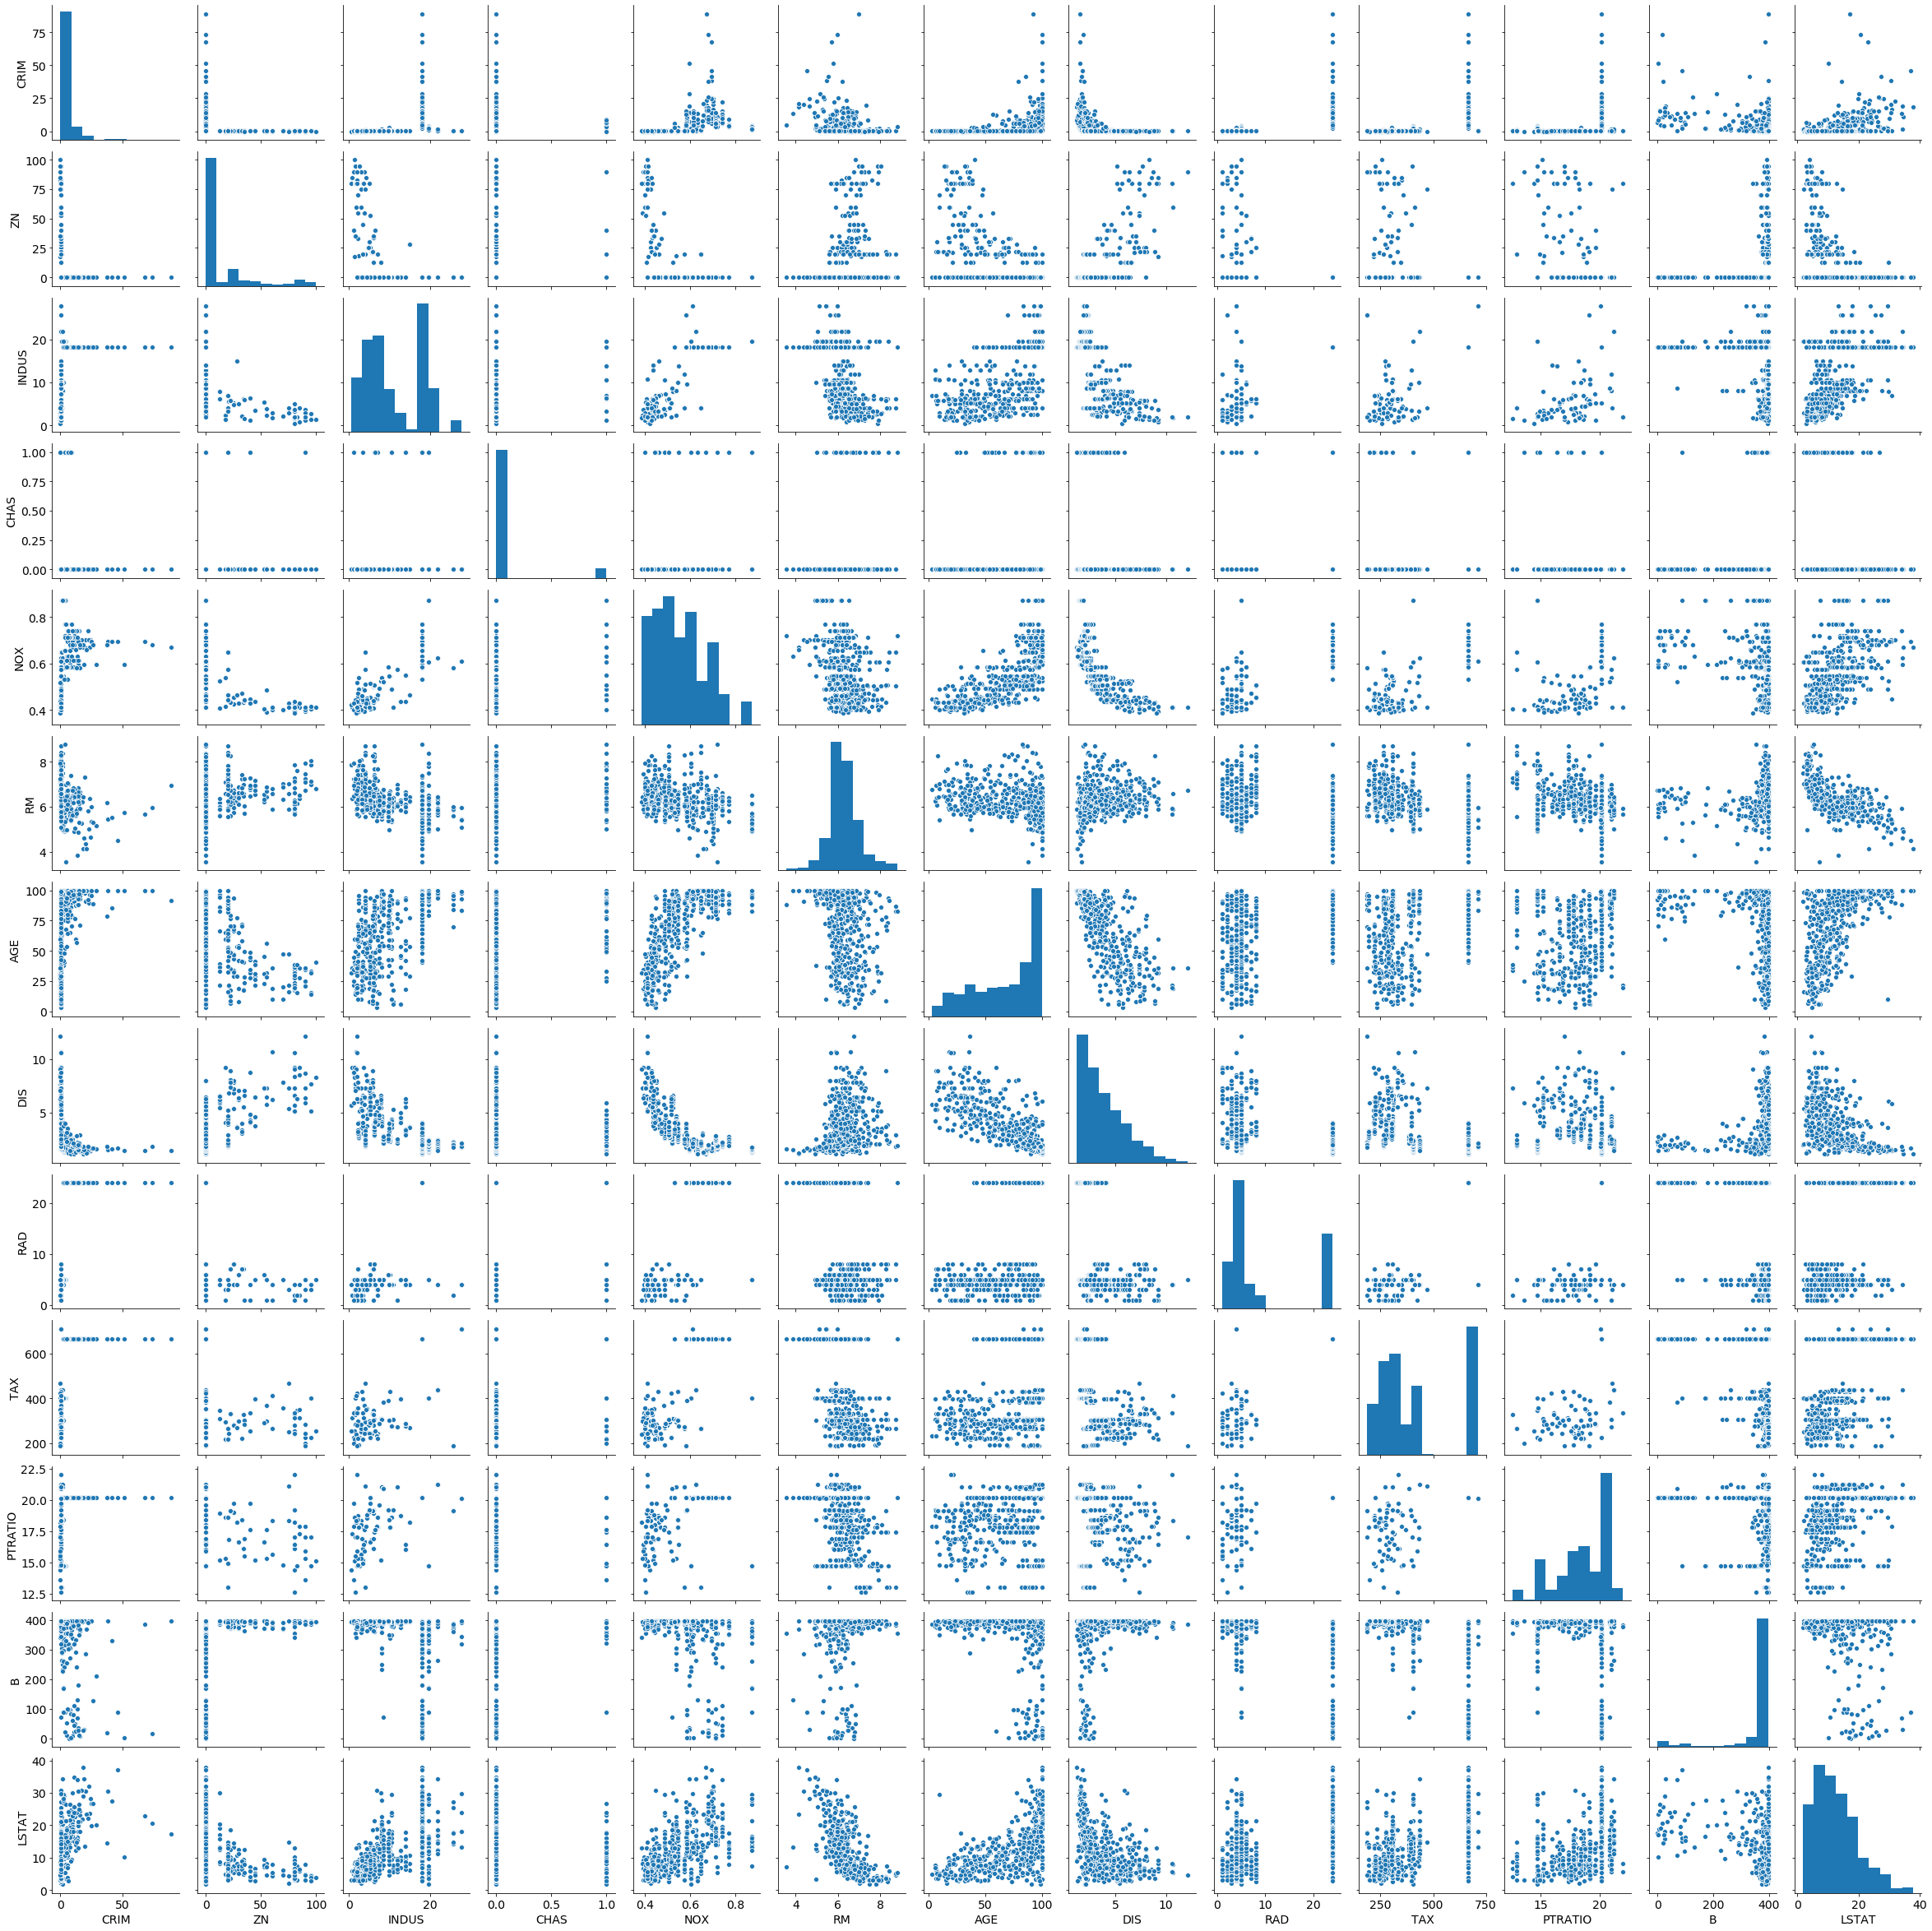

In [53]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [54]:
# Check out Pearson scores


## Demo: Patsy

In [55]:
import patsy

# Add response to the core DataFrame
df['MEDV'] = y

In [56]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


In [57]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.5569920805584259
